# Setup

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
# sns.set(style="white", color_codes=True)

import folium
import plotly.express as px


In [ ]:
df = pd.read_csv("./hotel_bookings.csv")

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Exploratory Data Analysis (EDA)    

In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00


## Guests by Country

In [ ]:
import os

# Used for indexing output image names
figure_index = 1
save_outputs = True
if not os.path.exists('Outputs'):
   os.makedirs('Outputs')

In [ ]:
# Count country
guests_by_country = df['country'].value_counts().reset_index()
guests_by_country.columns = ['country', 'guests']

# Plot to folium map
basemap = folium.Map()
guests_map = px.choropleth(guests_by_country, locations=guests_by_country['country'],
                           color=guests_by_country['guests'], hover_name=guests_by_country['country'],
                           title='Guests Count by Country', width=900, height=500)
guests_map.show()

if save_outputs:
    guests_map.write_image('./Outputs/output_{index}.png'.format(index=figure_index))
    figure_index += 1

In [ ]:
guests_by_country = df['country'].value_counts().reset_index()
guests_by_country.columns = ['country', 'total_guests']

# Take only countries with less than 10 records
guests_by_country = guests_by_country[guests_by_country['total_guests'] >= 10]

# Count canceled guest by country
canceled_guests_by_country = df[df['is_canceled'] == 1]['country'].value_counts().reset_index()
canceled_guests_by_country.columns = ['country', 'canceled_guests']

# Get cancellation %
guests_by_country = guests_by_country.merge(canceled_guests_by_country, on='country', how='left')
guests_by_country['cancellation_ratio'] = guests_by_country['canceled_guests'] / guests_by_country['total_guests']

# Only take more than 70%
guests_by_country = guests_by_country[guests_by_country['cancellation_ratio'] >= 0.7]

# Sort Ascending
guests_by_country = guests_by_country.sort_values(by='cancellation_ratio', ascending=True)

# Create a bar chart to display the cancellation ratios for each country
bar_chart = px.bar(guests_by_country,
                   x='cancellation_ratio',
                   y='country',
                   orientation='h',
                   title='Guests Cancellation Ratio by Country',
                   width=900,
                   height=500)

bar_chart.show()

if save_outputs:
    bar_chart.write_image('./Outputs/output_{index}.png'.format(index=figure_index))
    figure_index += 1

## Price per Month by Hotel

In [ ]:
!pip install sorted-months-weekdays
!pip install sort_dataframeby_monthorweek

  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3222 sha256=c361f019823bcf66d4fe6876ac3e87adc11dc83788c55d6339c79c63abccbdbd
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays
  Preparing metadata (setup.py) ... done
  Created wheel for sort_dataframeby_monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3420 sha256=8589b32a22d4b783c96d888f256058f69f0627d09090ebf453a8208da8f58ebf
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort_dataframeby_monthorweek


In [ ]:
import sort_dataframeby_monthorweek as sd

# Split hotels
data_resort = df[(df['hotel'] == 'Resort Hotel')]
data_city = df[(df['hotel'] == 'City Hotel')]

# Get average pricing (mean)
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

# Sort by months
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_prices = sd.Sort_Dataframeby_Month(final_hotel, 'month')

# Plot
plt.figure(figsize = (17, 8))
price_hotel = px.line(final_prices, x = 'month', y =['price_for_resort', 'price_for_city_hotel'],
        title = 'Price per Month by Hotel', template = 'plotly', labels={'month': 'Month', 'value': 'Average Price'}, width=900, height=600)
price_hotel.show()

if save_outputs:
        price_hotel.write_image('./Outputs/output_{index}.png'.format(index=figure_index))
        figure_index += 1



<Figure size 1700x800 with 0 Axes>

In [ ]:
import sort_dataframeby_monthorweek as sd

# Split hotels
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 1)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 1)]

# Get average pricing (mean)
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

# Sort by months
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_prices = sd.Sort_Dataframeby_Month(final_hotel, 'month')

# Plot
plt.figure(figsize = (17, 8))
price_hotel = px.line(final_prices, x = 'month', y =['price_for_resort', 'price_for_city_hotel'],
        title = 'Price per Month by Hotel', template = 'plotly', labels={'month': 'Month', 'value': 'Average Price'}, width=900, height=600)
price_hotel.show()

if save_outputs:
        price_hotel.write_image('./Outputs/output_{index}.png'.format(index=figure_index))
        figure_index += 1


<Figure size 1700x800 with 0 Axes>

## Guests per Month

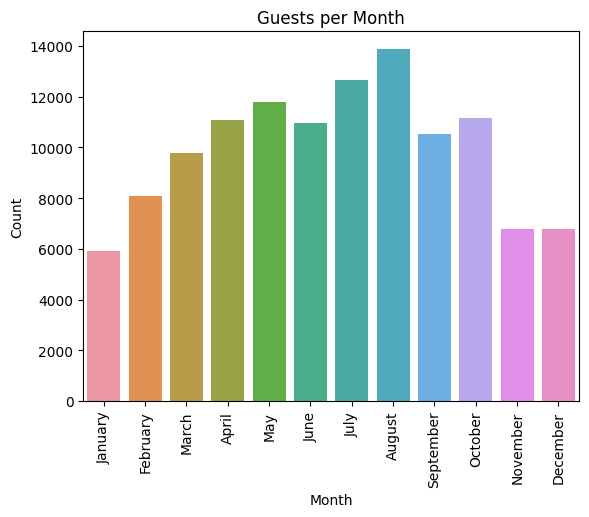

In [ ]:
ax = sns.barplot(
    x=df["arrival_date_month"].value_counts().index,
    y=df["arrival_date_month"].value_counts(),
    order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
)
ax.set(title = 'Guests per Month', xlabel='Month', ylabel='Count')
plt.xticks(rotation=90);

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Cancellation rate per month

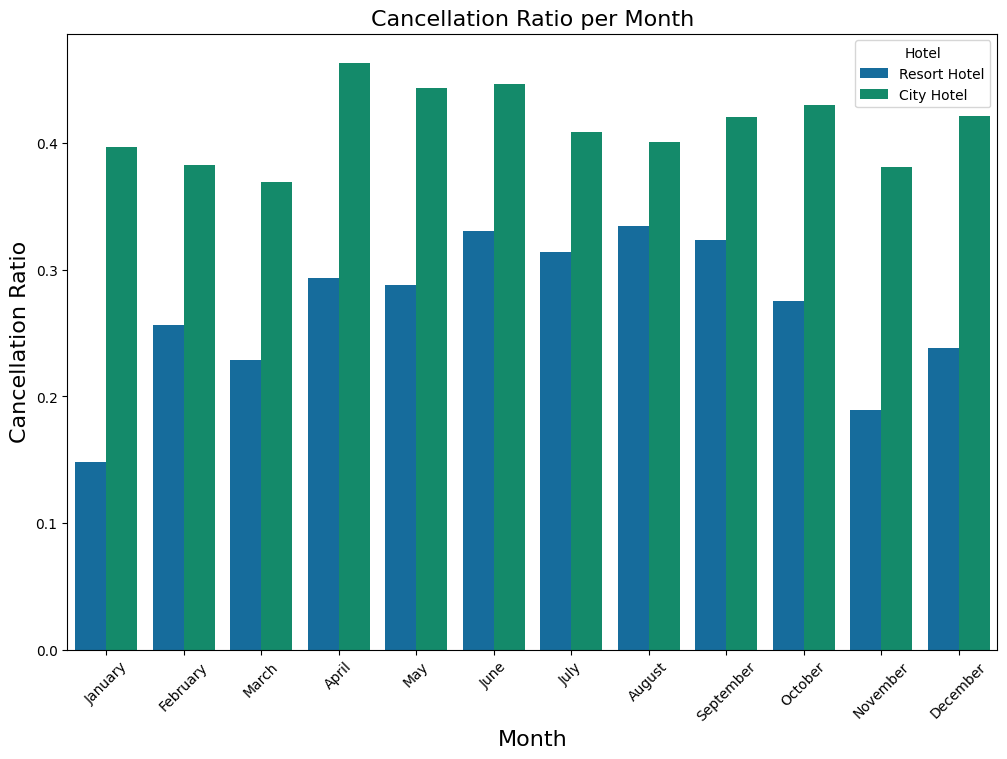

<Figure size 640x480 with 0 Axes>

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

data_resort = df[(df['hotel'] == 'Resort Hotel')]
data_city = df[(df['hotel'] == 'City Hotel')]

# Get cancellation ratio for resort
res_cancellation_counts = data_resort[data_resort["is_canceled"] == 1].groupby("arrival_date_month")["is_canceled"].count()
res_total_counts = data_resort.groupby("arrival_date_month")["is_canceled"].count()
res_cancellation_ratios = (res_cancellation_counts / res_total_counts).reindex(month_order, fill_value=0)

# Get cancellation ratio for city hotel
city_cancellation_counts = data_city[data_city["is_canceled"] == 1].groupby("arrival_date_month")["is_canceled"].count()
city_total_counts = data_city.groupby("arrival_date_month")["is_canceled"].count()
city_cancellation_ratios = (city_cancellation_counts / city_total_counts).reindex(month_order, fill_value=0)

# Merge both data set
cancellation_data = pd.DataFrame({
    "Month": month_order,
    "Resort Hotel": res_cancellation_ratios.values,
    "City Hotel": city_cancellation_ratios.values
})

# Sort months
cancellation_data["Month"] = pd.Categorical(cancellation_data["Month"], categories=month_order, ordered=True)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x="Month", y="value", hue="variable", data=pd.melt(cancellation_data, id_vars=["Month"]))
plt.title("Cancellation Ratio per Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancellation Ratio", fontsize=16)
plt.legend(title="Hotel")
plt.show()

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Guests per Month by Hotel

In [ ]:
import plotly.graph_objects as go

# Split hotels and declare them into variables
data_resort = df[(df['hotel'] == 'Resort Hotel')]
data_city = df[(df['hotel'] == 'City Hotel')]

data_resort_c = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 1)]
data_city_c = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 1)]

# Count the data by months
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns = ['month', 'no of guests']

city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns = ['month', 'no of guests']

resort_canceled_guests = data_resort_c['arrival_date_month'].value_counts().reset_index()
resort_canceled_guests.columns = ['month', 'canceled guests in resort']

city_canceled_guests = data_city_c['arrival_date_month'].value_counts().reset_index()
city_canceled_guests.columns = ['month', 'canceled guests in city']

# Merge data
final_guests = resort_guests.merge(city_guests, on='month', how='outer')
final_guests = final_guests.merge(resort_canceled_guests, on='month', how='outer')
final_guests = final_guests.merge(city_canceled_guests, on='month', how='outer')
final_guests.columns = ['month', 'guests in resort hotel', 'guests in city hotel', 'canceled guests in resort', 'canceled guests in city']
final_guests = sd.Sort_Dataframeby_Month(final_guests, 'month')

# Create an area chart
fig = px.area(
    final_guests,
    x='month',
    y=['guests in resort hotel', 'guests in city hotel'],
    title='Guests per Month by Hotel',
    template='plotly',
    labels={'value': 'Count', 'month': 'Month'},
    width=900,
    height=600,
    color_discrete_map={'guests in resort hotel': 'blue', 'guests in city hotel': 'red'}
)

# Add dotted lines for canceled guests
fig.add_trace(go.Scatter(
    x=final_guests['month'],
    y=final_guests['canceled guests in resort'],
    mode='lines',
    name='canceled guests in resort',
    line=dict(dash='dot', color='blue')
))

fig.add_trace(go.Scatter(
    x=final_guests['month'],
    y=final_guests['canceled guests in city'],
    mode='lines',
    name='canceled guests in city',
    line=dict(dash='dot', color='red')
))

fig.show()

# Save the plot if save_outputs is True
if save_outputs:
    fig.write_image('./Outputs/output_{index}.png'.format(index=figure_index))
    figure_index += 1

## Guests per Month by Year

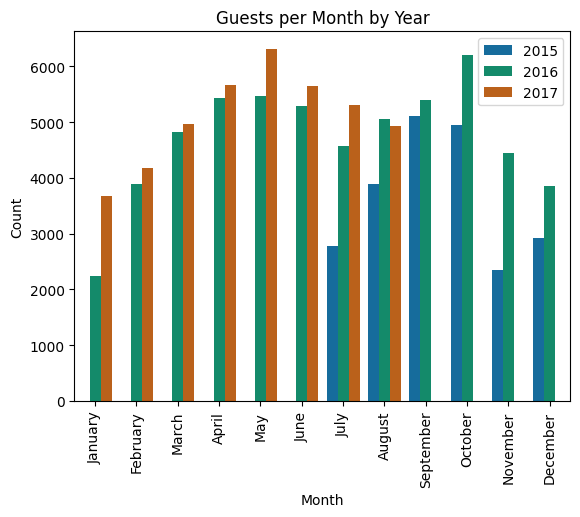

In [ ]:
ax = sns.countplot(
    data=df,
    x="arrival_date_month",
    hue="arrival_date_year",
    order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
)
ax.set(xlabel='Month', ylabel='Count', title = 'Guests per Month by Year')
plt.legend(loc="upper right")
plt.xticks(rotation=90);

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Guests per Month by Hotel per Year

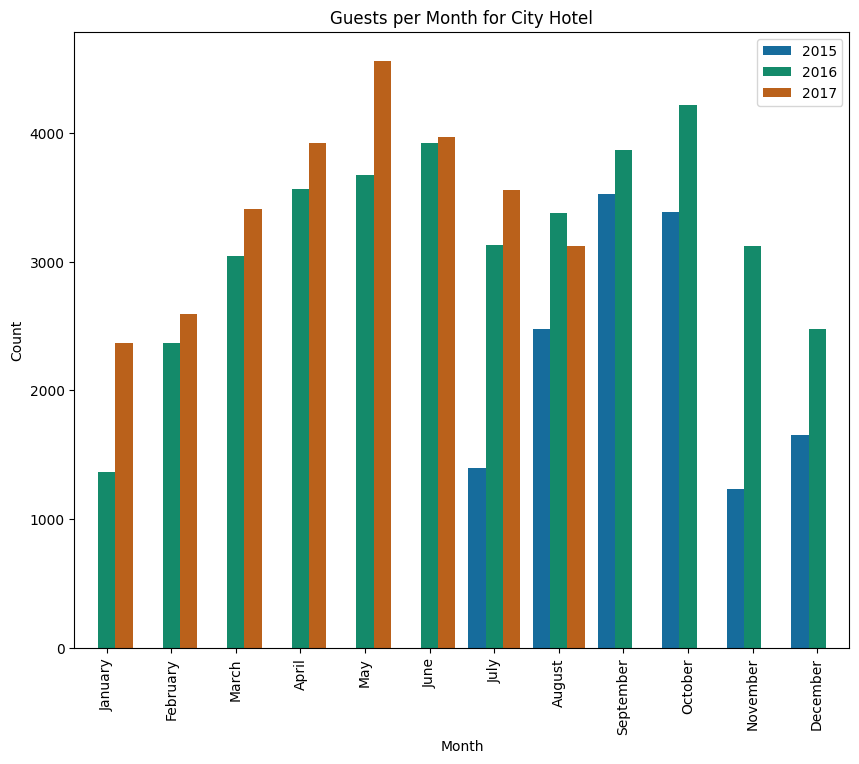

In [ ]:
fig = plt.figure(figsize=(10, 8))

ax = sns.countplot(
    data=df,
    x=df[df["hotel"] == "City Hotel"]["arrival_date_month"],
    hue="arrival_date_year",
    order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
)
ax.set(ylabel='Count', xlabel='Month')
plt.title("Guests per Month for City Hotel")
plt.legend(loc="upper right")
plt.xticks(rotation=90)

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

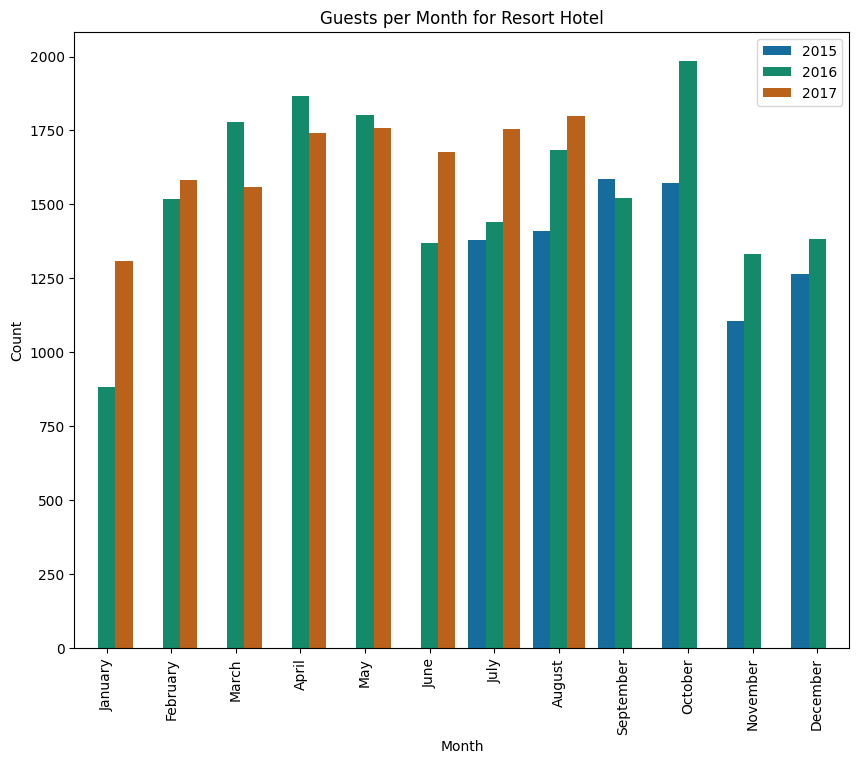

In [ ]:
fig = plt.figure(figsize=(10, 8))

ax = sns.countplot(
    data=df,
    x=df[df["hotel"] == "Resort Hotel"]["arrival_date_month"],
    hue="arrival_date_year",
    order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
)
ax.set(xlabel='Month', ylabel='Count')
plt.title("Guests per Month for Resort Hotel")
plt.legend(loc="upper right")
plt.xticks(rotation=90);

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Length of Stay per Guest

In [ ]:
filter = df['is_canceled'] == 0
data = df[filter]
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
guest_stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
guest_stay = guest_stay.iloc[:, :3]
guest_stay = guest_stay.rename(columns={'is_canceled': 'Number of stays', 'total_nights': 'Total Nights'})
guest_stay
length_guest = px.bar(data_frame = guest_stay, x = 'Total Nights', y = 'Number of stays', color = 'hotel', barmode = 'group'
       , template = 'plotly', title='Length of Stay per Guest', width=1200, height=600)
length_guest.show()

average_length_of_stay = data.groupby('hotel')['total_nights'].mean().reset_index(name='Average Length of Stay')

print(average_length_of_stay)

if save_outputs:
       length_guest.write_image('./Outputs/output_{index}.png'.format(index=figure_index))
       figure_index += 1

          hotel  Average Length of Stay
0    City Hotel                2.923618
1  Resort Hotel                4.142892


## Stays per Weekend Nights by Hotel

          hotel  Average Length of Stay in Weekend
0    City Hotel                           0.795185
1  Resort Hotel                           1.189815


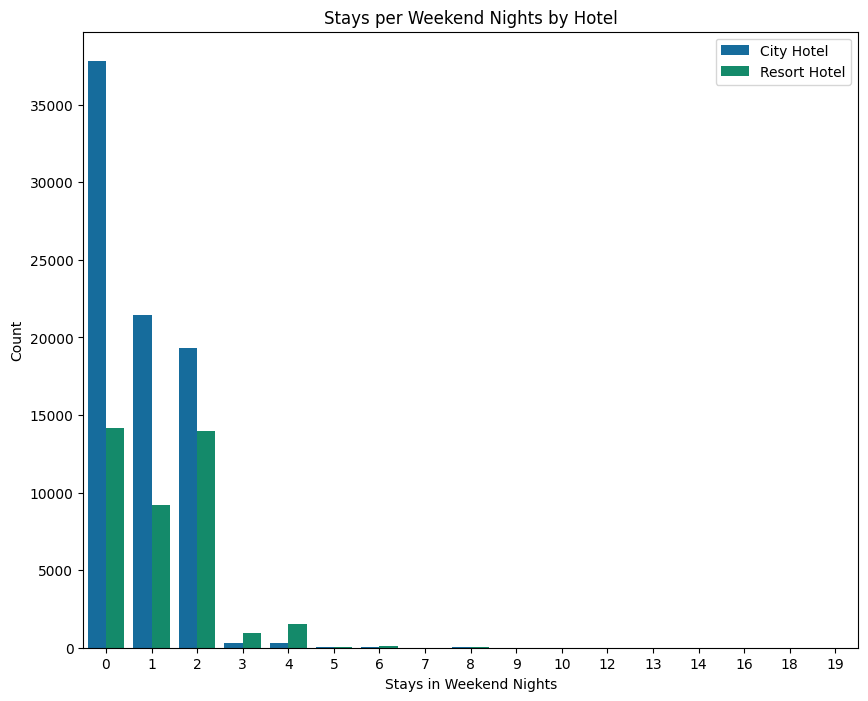

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(
    data=df,
    x="stays_in_weekend_nights",
    hue="hotel",
    hue_order=["City Hotel", "Resort Hotel"]
)
ax.set(xlabel='Stays in Weekend Nights', ylabel='Count', title='Stays per Weekend Nights by Hotel')
plt.legend(loc="upper right")

average_nights_per_weekend = df.groupby("hotel")["stays_in_weekend_nights"].mean().reset_index(name='Average Length of Stay in Weekend')
print(average_nights_per_weekend)

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

plt.show()

## Stays per Weekday Nights by Hotel

          hotel  Average Length of Stay in Weekday
0    City Hotel                           2.182957
1  Resort Hotel                           3.128732


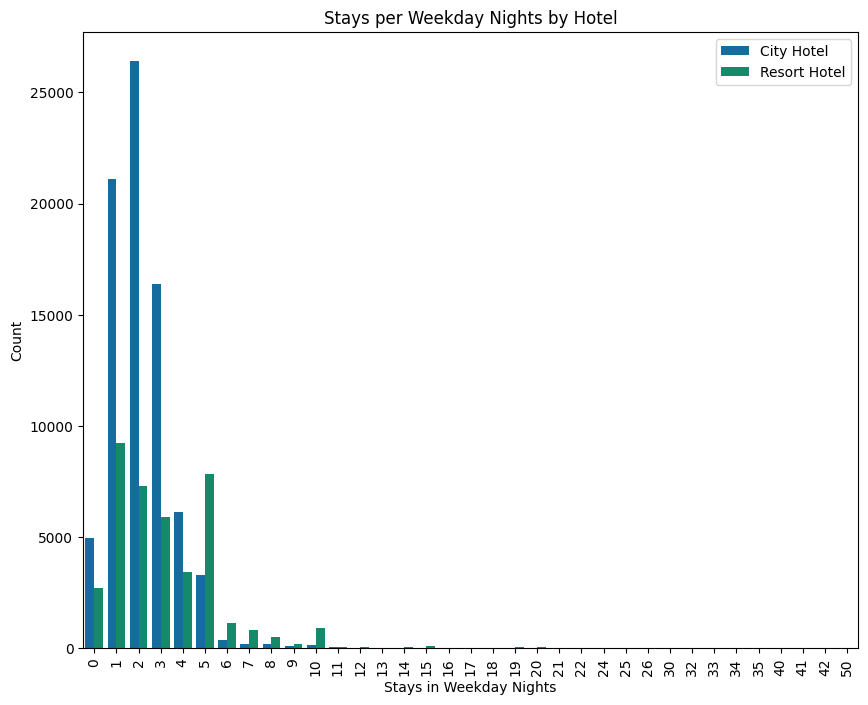

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(
    data=df,
    x="stays_in_week_nights",
    hue="hotel",
    hue_order=["City Hotel", "Resort Hotel"]
)
ax.set(xlabel='Stays in Weekday Nights', ylabel='Count', title='Stays per Weekday Nights by Hotel')
plt.legend(loc="upper right")
plt.xticks(rotation=90);

average_nights_per_weekday = df.groupby("hotel")["stays_in_week_nights"].mean().reset_index(name='Average Length of Stay in Weekday')
print(average_nights_per_weekday)

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Bookings by Hotel

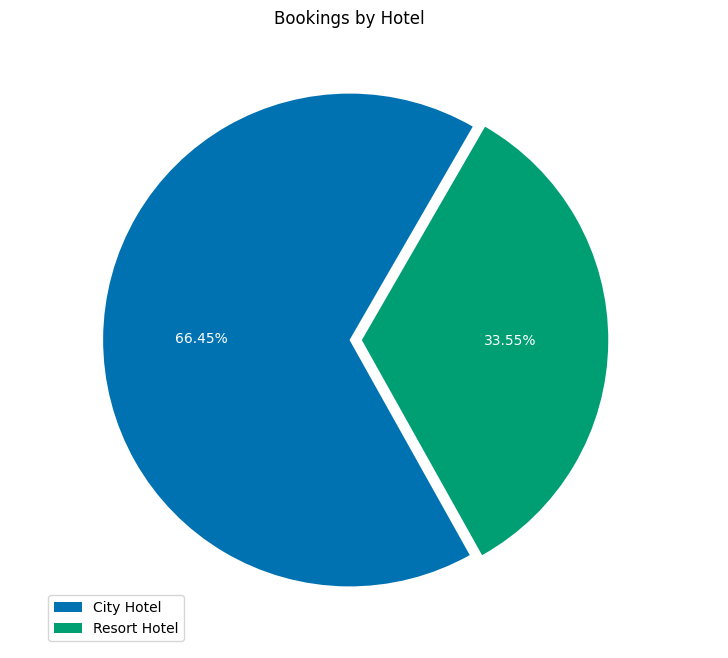

In [ ]:
labels = ['City Hotel', 'Resort Hotel']
booking = df['hotel'].value_counts()

plt.figure(figsize=(8,8))

ax = plt.pie(
    booking,
    explode=(0, 0.05),
    labels=labels,
    autopct="%.2f%%",
    startangle=60,
    textprops={'color': 'w'}
)
plt.title('Bookings by Hotel')
plt.legend(loc='lower left')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Cancellations by Hotel

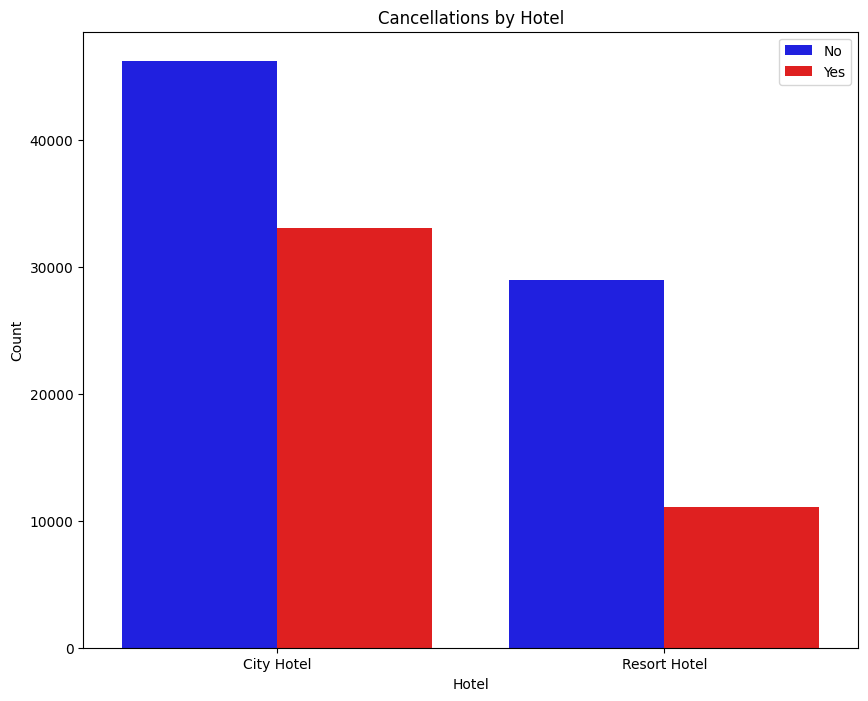

In [ ]:
plt.figure(figsize=(10, 8))
canceled_palette = {0: 'blue', 1: 'red'}

ax = sns.countplot(
    data=df,
    x='hotel',
    hue='is_canceled',
    palette=canceled_palette,
    order=['City Hotel', 'Resort Hotel']
)
ax.set(title='Cancellations by Hotel', xlabel='Hotel', ylabel='Count')
plt.legend(
    labels=['No', 'Yes'],
    loc='upper right'
)

save_outputs = True
if save_outputs:
    plt.savefig('./Outputs/output_{index}.png'.format(index=figure_index))
    figure_index += 1

plt.show()

## Refresh data frame


In [ ]:
# Refresh the data frame
df = pd.read_csv("./hotel_bookings.csv")

## Lead Time Distribution by Hotel

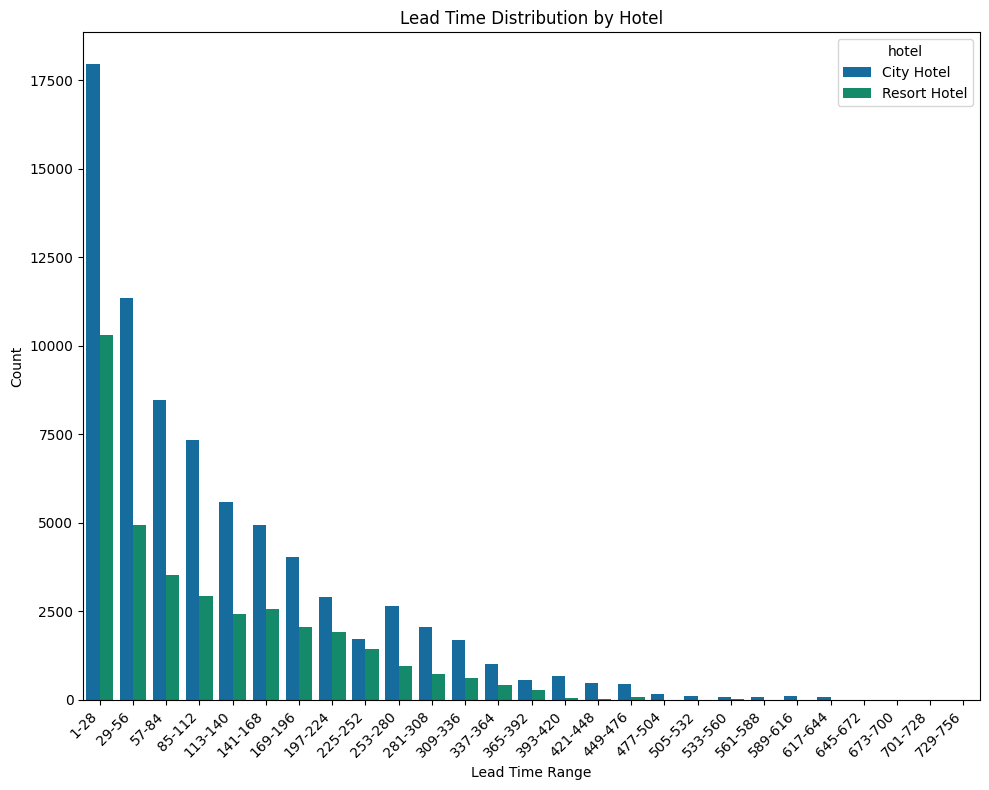

In [ ]:

bin_size = 28
# Get bin range data and labels
bins = np.arange(1, df['lead_time'].max() + bin_size, bin_size)
bin_labels = [f'{bin_start}-{bin_start+bin_size-1}' for bin_start in bins[:-1]]

# Group lead times
df['lead_time_bin'] = pd.cut(df['lead_time'], bins, labels=bin_labels)
lead_time_counts = df.groupby(['lead_time_bin', 'hotel']).size().reset_index(name='count')

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=lead_time_counts, x='lead_time_bin', y='count', hue='hotel')
ax.set(title='Lead Time Distribution by Hotel', xlabel='Lead Time Range', ylabel='Count')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

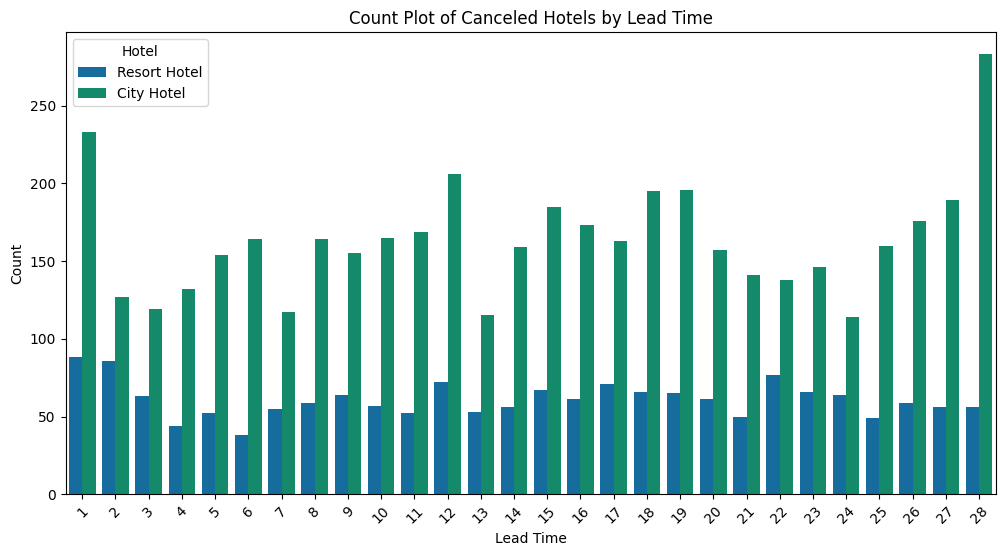

In [ ]:
filter = (df['lead_time'] > 0) & (df['lead_time'] < 29) & (df['is_canceled'] == 1)
filtered_df = df[filter]

# Create a count plot grouped by 'hotel' and 'lead_time'
plt.figure(figsize=(12, 6))  # Set the figure size
sns.countplot(data=filtered_df, x='lead_time', hue='hotel')
plt.title("Count Plot of Canceled Hotels by Lead Time")
plt.xlabel("Lead Time")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Hotel')
plt.show()

## Guests Who Did Not Book in Advance

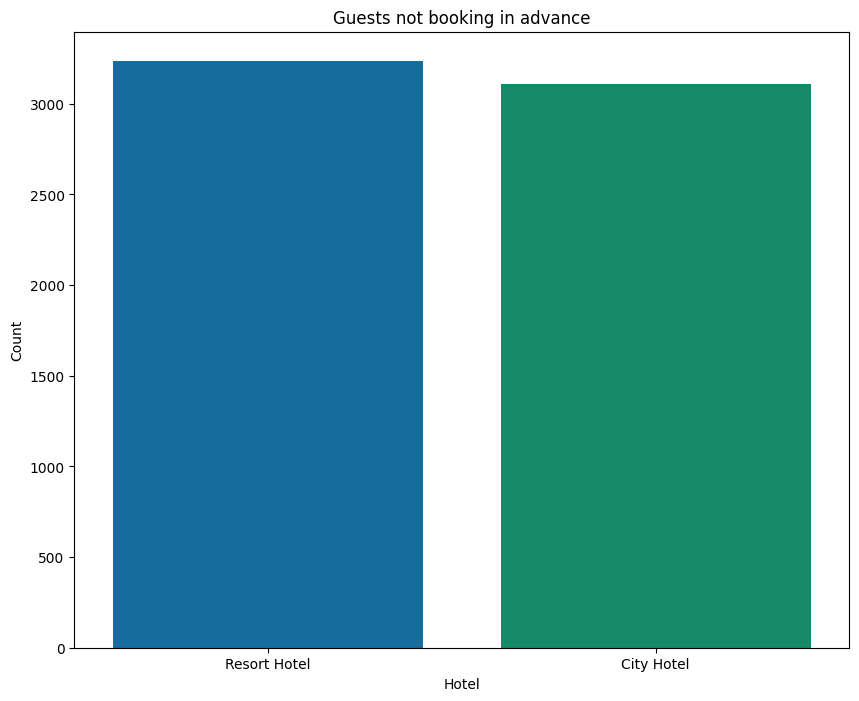

In [ ]:
plt.figure(figsize=(10,8))
not_in_advance = df['hotel'][df['lead_time']==0].agg('value_counts')
not_in_advance = pd.DataFrame(not_in_advance).reset_index()
not_in_advance.columns = ['Hotel', 'Count']
sns.barplot(
    data=not_in_advance,
    x='Hotel',
    y='Count'
).set(title='Guests not booking in advance')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Bookings by Year

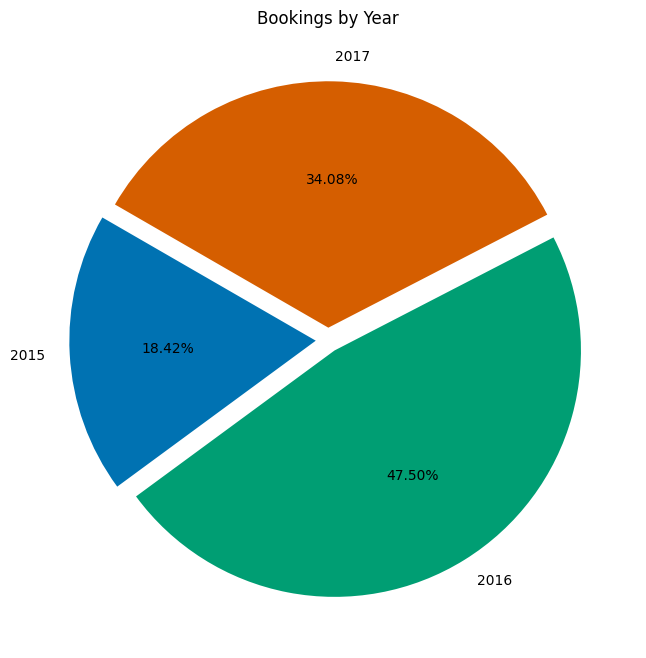

In [ ]:
year = [2015, 2016, 2017]
counts = df.arrival_date_year.value_counts().sort_index()

plt.figure(figsize=(8,8))

plt.pie(
    counts,
    explode=(0.05, 0.05, 0.05),
    labels=year,
    autopct='%.2f%%',
    startangle=150
)
plt.title('Bookings by Year')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Guests per Year by Hotel

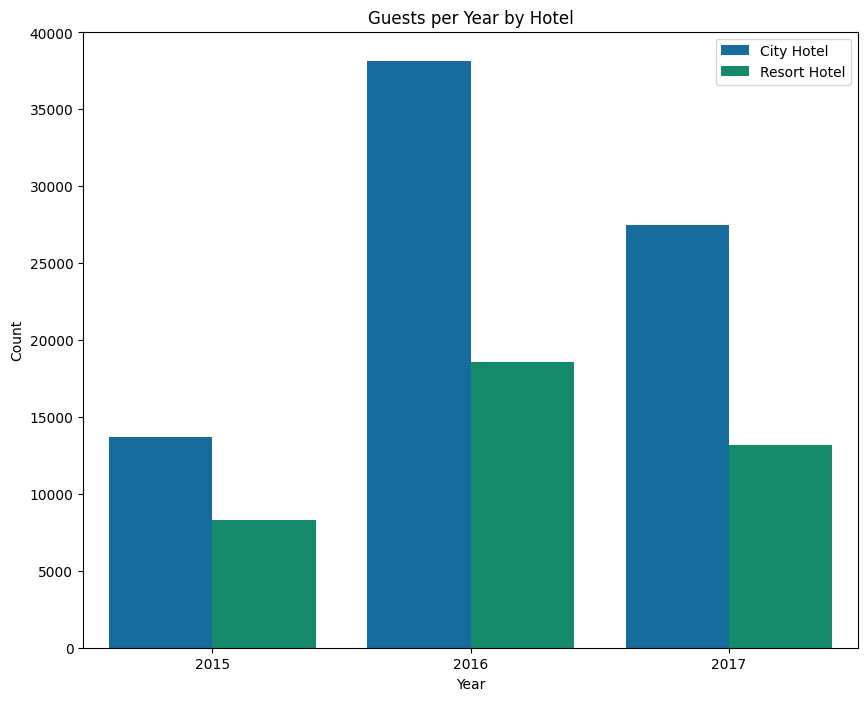

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(
    data=df,
    x='arrival_date_year',
    hue='hotel',
    hue_order=['City Hotel', 'Resort Hotel']
)
ax.set(title='Guests per Year by Hotel', xlabel='Year', ylabel='Count')
plt.legend(loc='upper right')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
figure_index += 1

## Guests per Week by Month

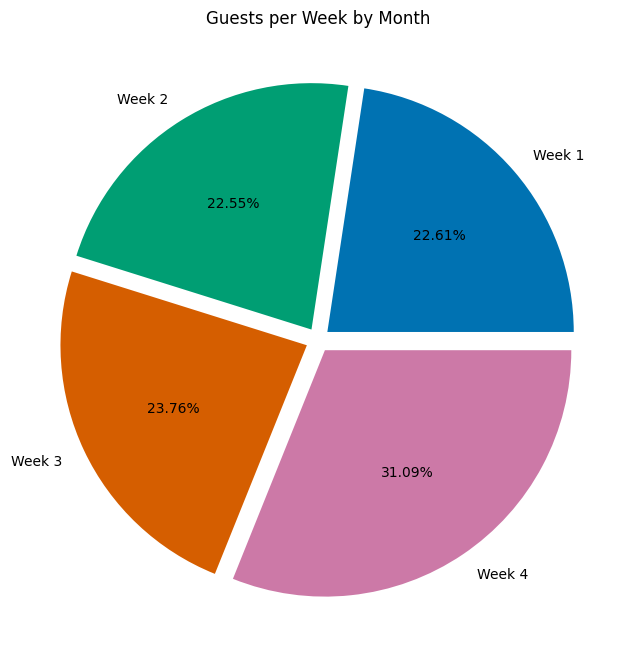

In [ ]:
plt.figure(figsize=(8,8))
data = df[df["is_canceled"] == 0]
guests_weekly = []

week1 = len(data[(data["arrival_date_day_of_month"] >= 1) & (data["arrival_date_day_of_month"] <= 7)])
week2 = len(data[(data["arrival_date_day_of_month"] >= 8) & (data["arrival_date_day_of_month"] <= 14)])
week3 = len(data[(data["arrival_date_day_of_month"] >= 15) & (data["arrival_date_day_of_month"] <= 21)])
week4 = len(data[(data["arrival_date_day_of_month"] >= 22) & (data["arrival_date_day_of_month"] <= 31)])

guests_weekly.append(week1)
guests_weekly.append(week2)
guests_weekly.append(week3)
guests_weekly.append(week4)

plt.pie(
    guests_weekly,
    explode=(0.05, 0.05, 0.05, 0.05),
    autopct='%.2f%%',
    labels=['Week 1', 'Week 2', 'Week 3', 'Week 4']
)
plt.title('Guests per Week by Month')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Adults with Children & Babies

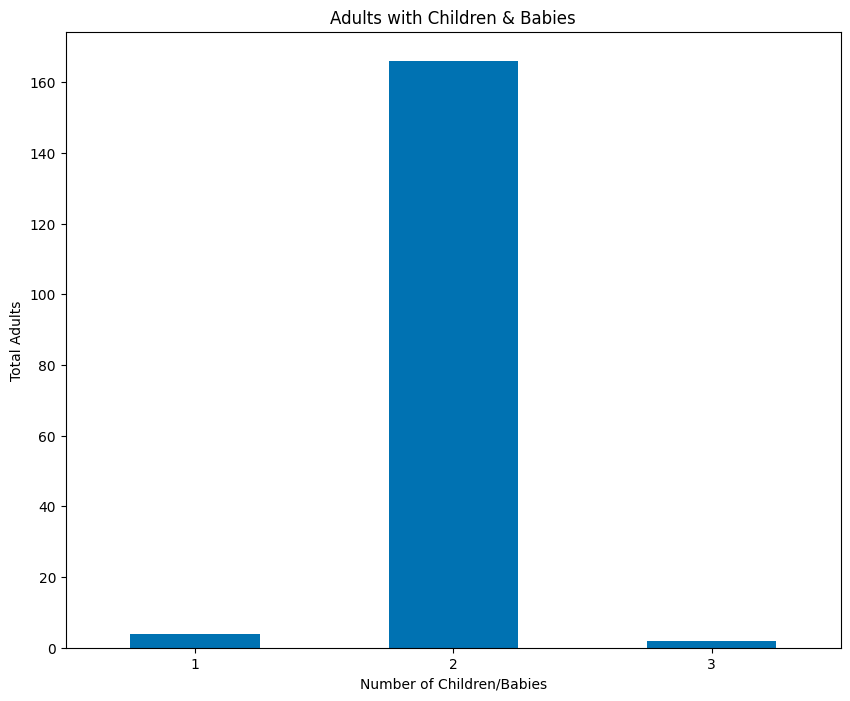

In [ ]:
plt.figure(figsize=(10,8))
df.iloc[np.where((df["adults"] > 0) & (df["children"] > 0) & (df["babies"] > 0))]["adults"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0);
plt.title('Adults with Children & Babies')
plt.xlabel('Number of Children/Babies')
plt.ylabel('Total Adults')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Adults with Children

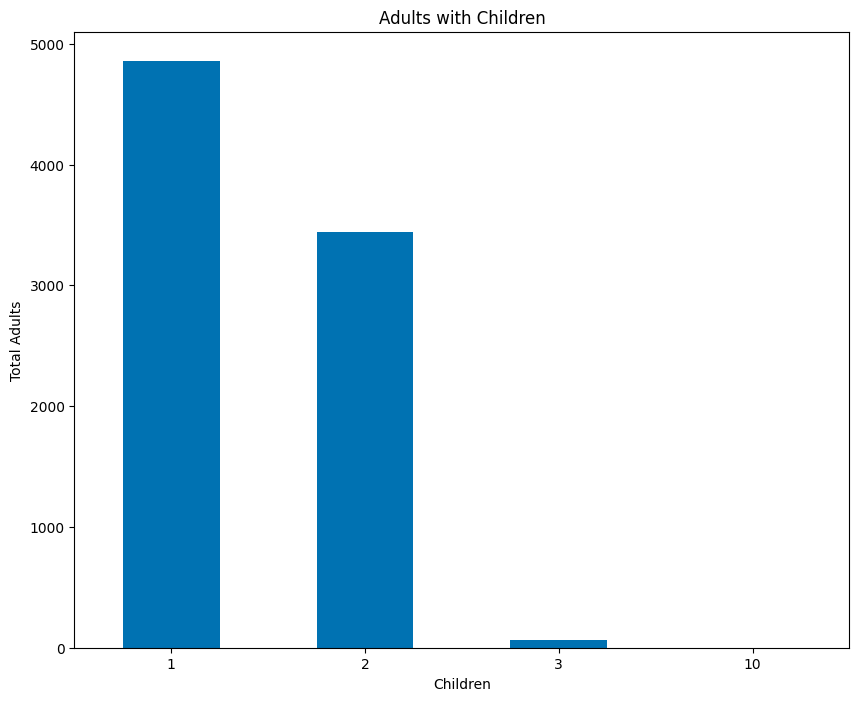

In [ ]:
plt.figure(figsize=(10,8))
df.iloc[np.where((df["adults"] > 0) & (df["children"] > 0))]["children"].astype("int32").value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0);
plt.title('Adults with Children')
plt.xlabel('Children')
plt.ylabel('Total Adults')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Adults with Babies

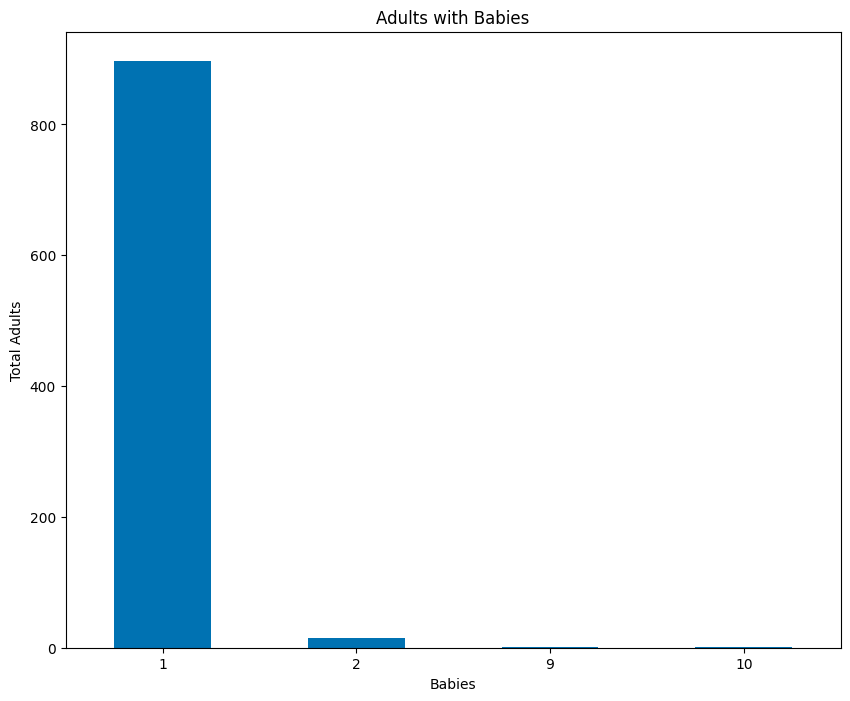

In [ ]:
plt.figure(figsize=(10,8))
df.iloc[np.where((df["adults"] > 0) & (df["babies"] > 0))]["babies"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0);
plt.title('Adults with Babies')
plt.xlabel('Babies')
plt.ylabel('Total Adults')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Meal Plan Popularity

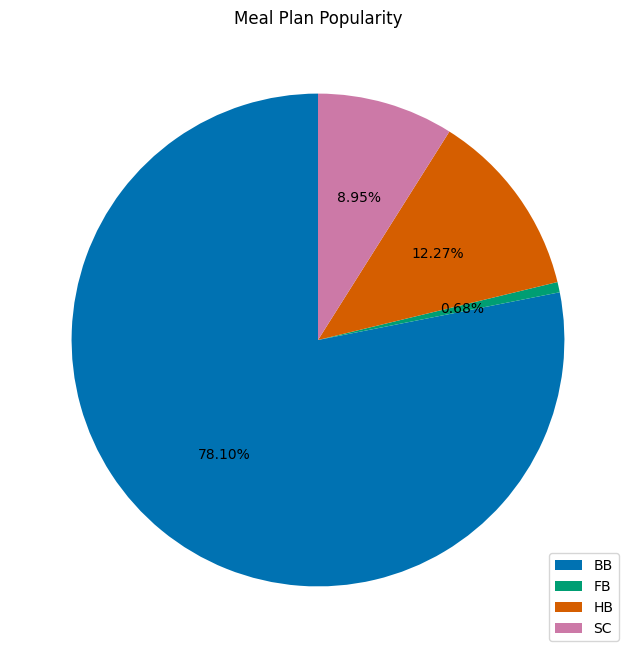

In [ ]:
labels = ["BB", "FB", "HB", "SC"]
meal_count = df[df['meal'] != 'Undefined']
meal_count = meal_count.iloc[np.where(meal_count["adults"])]["meal"].value_counts().sort_index()
plt.figure(figsize=(8 , 8))
patches = plt.pie(
    meal_count,
    autopct="%.2f%%",
    startangle=90,
)
plt.legend(labels,  loc="lower right");
plt.title('Meal Plan Popularity')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1


## Room Type Popularity by Hotel

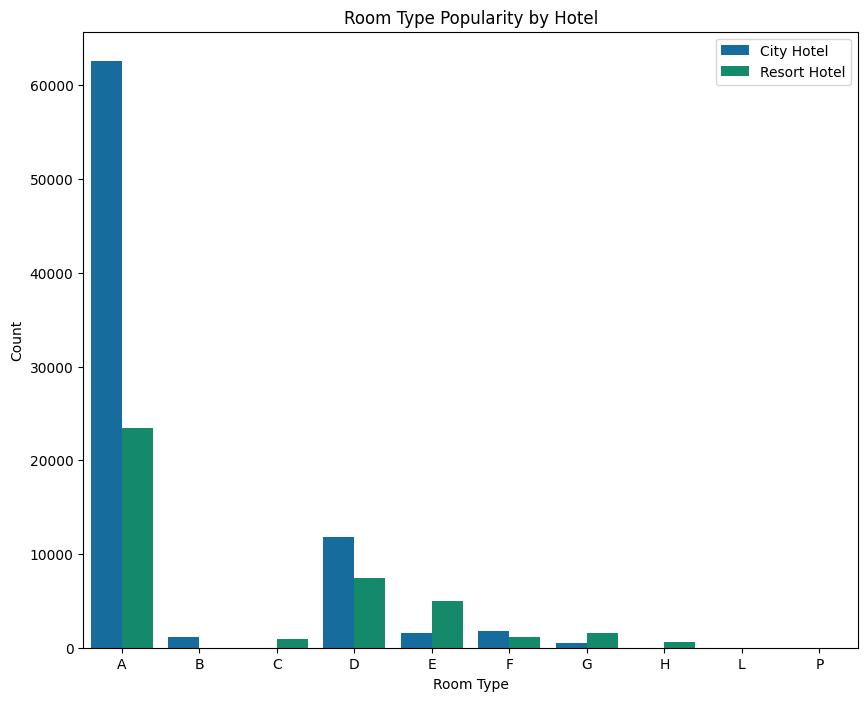

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(
    data=df,
    x="reserved_room_type",
    hue="hotel",
    order=df["reserved_room_type"].value_counts().sort_index().index,
    hue_order=["City Hotel", "Resort Hotel"]
)
ax.set(title='Room Type Popularity by Hotel', xlabel='Room Type', ylabel='Count')
plt.legend(loc="upper right");

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Deposit Type Most Cancelled

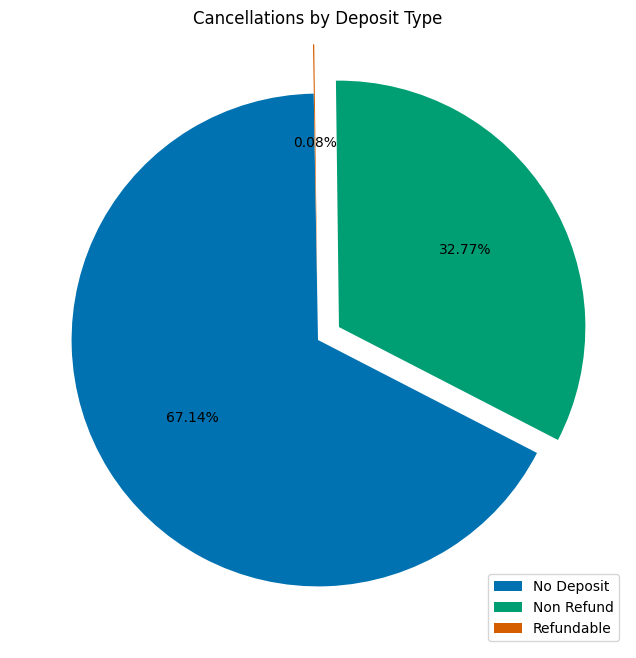

In [ ]:
plt.figure(figsize=(8, 8))
deposit = ["No Deposit", "Non Refund", "Refundable"]
count = df["deposit_type"][df["is_canceled"] == 1].value_counts()

plt.pie(
    count,
    explode=(0, 0.1, 0.2),
    autopct="%.2f%%",
    startangle=91
);
plt.legend(deposit,  loc="lower right");
plt.title('Cancellations by Deposit Type')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Preferred Deposit Type by Hotel

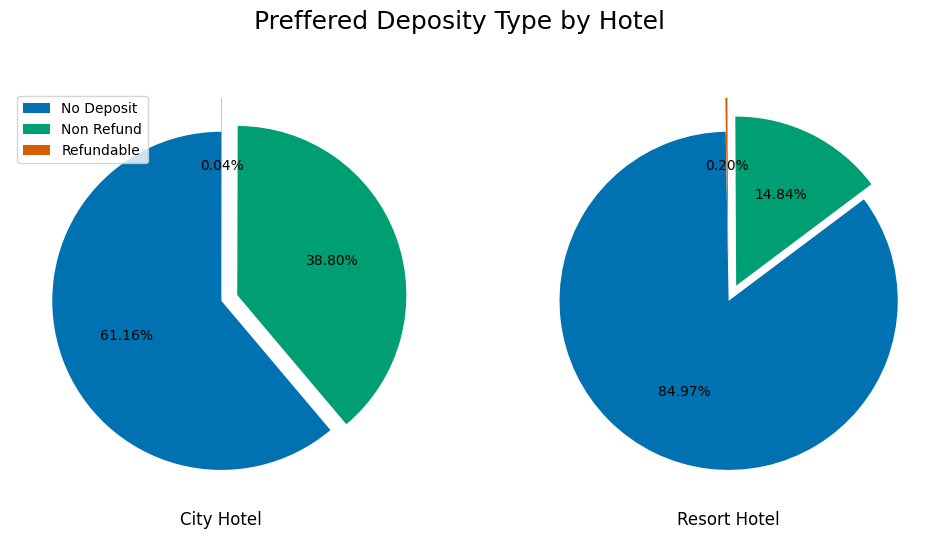

In [ ]:
deposit = ["No Deposit", "Non Refund", "Refundable"]
deposit_city = df[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 1)]["deposit_type"].value_counts().sort_index(ascending=True)
deposit_resort = df[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 1)]["deposit_type"].value_counts().sort_index(ascending=True)

fig = plt.figure(figsize=(12, 6))
fig.suptitle("Preffered Deposity Type by Hotel", fontsize=18)

plt.subplot(1, 2, 1)
plt.pie(
    deposit_city,
    explode=(0, 0.1, 0.2),
    autopct="%.2f%%",
    startangle=90
)
plt.title(
    "City Hotel",
    y=-0.05
)
plt.legend(deposit, loc='upper left', fontsize=10)

plt.subplot(1, 2, 2)
plt.pie(
    deposit_resort,
    explode=(0, 0.1, 0.2),
    autopct="%.2f%%",
    startangle=91
)
plt.title(
    "Resort Hotel",
    y=-0.05,
);

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Previous Cancellations for Repeated Guests

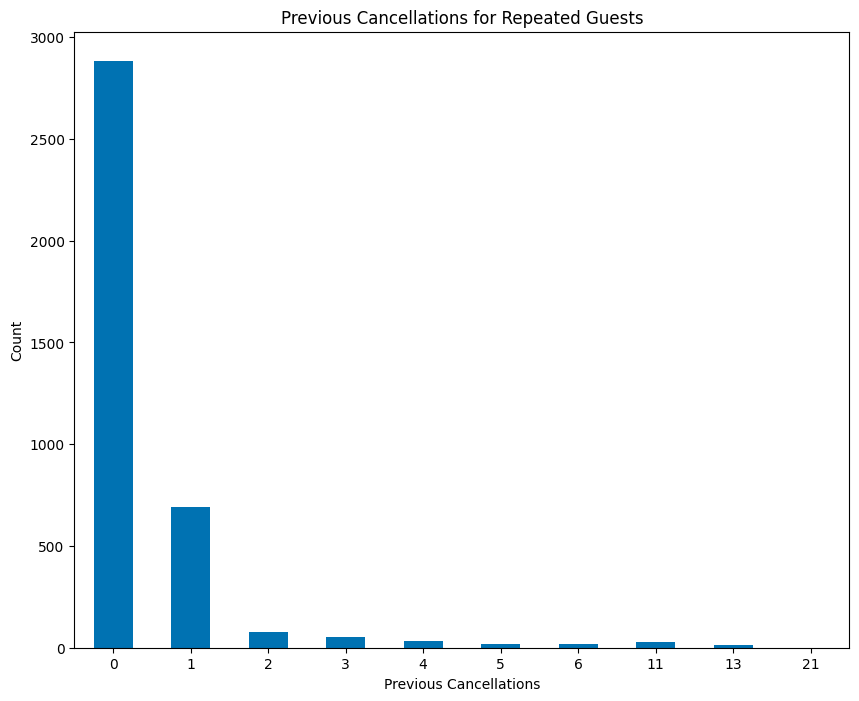

In [ ]:
plt.figure(figsize=(10,8))
df[df["is_repeated_guest"] == 1]["previous_cancellations"].value_counts().sort_index(ascending=True).plot(kind="bar")
plt.xticks(rotation=0);
plt.title('Previous Cancellations for Repeated Guests')
plt.xlabel('Previous Cancellations')
plt.ylabel('Count')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Number of Booking Changes by Hotel

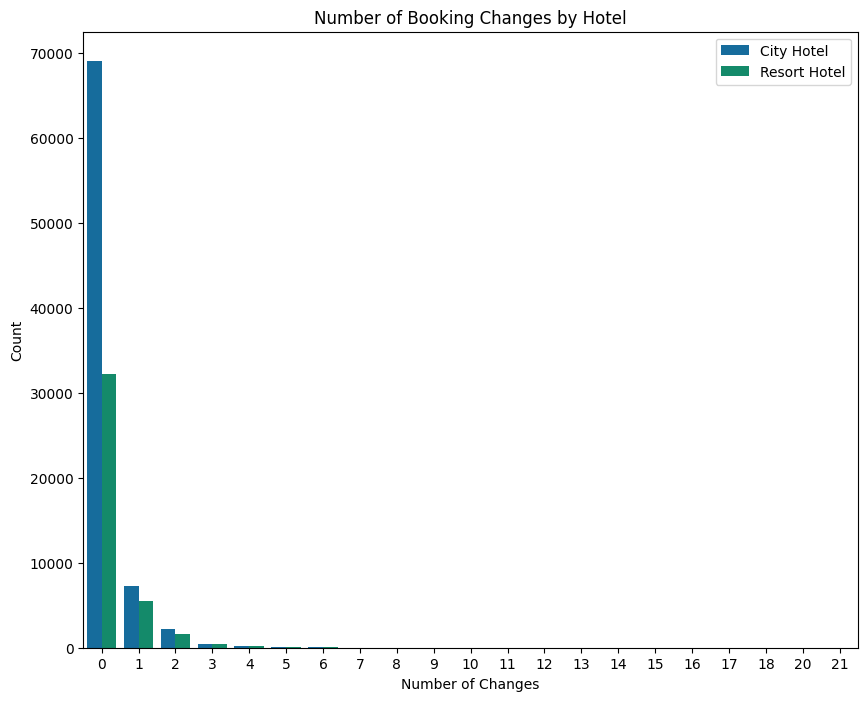

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(
    data=df,
    x="booking_changes",
    hue="hotel",
    hue_order=["City Hotel", "Resort Hotel"]
)
ax.set(title='Number of Booking Changes by Hotel', xlabel='Number of Changes', ylabel='Count')
plt.legend(loc="upper right");

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

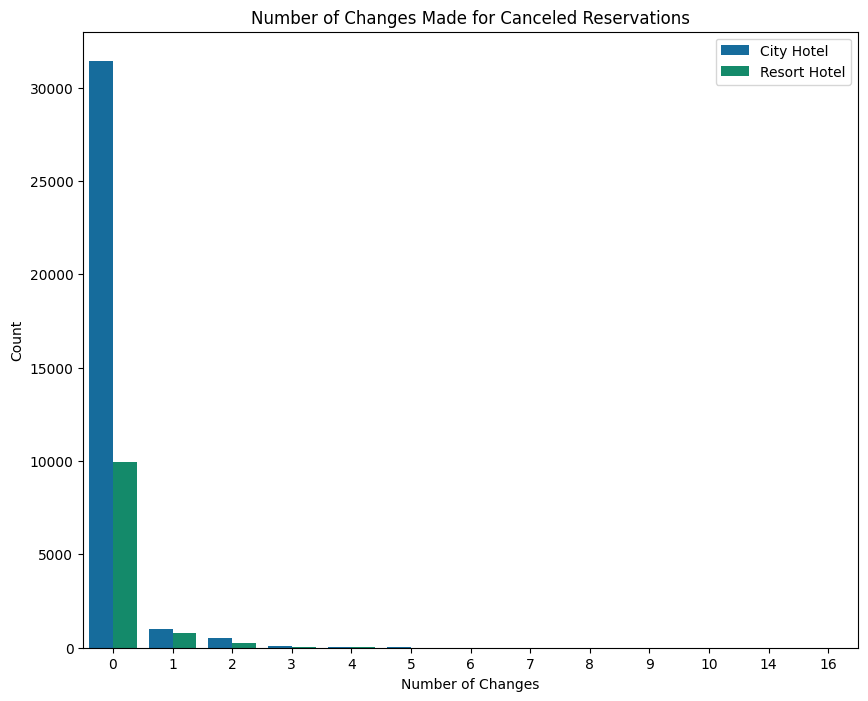

In [ ]:
plt.figure(figsize=(10,8))
canceled_reservations = df[(df['is_canceled'] == 1)]
ax = sns.countplot(
    data=canceled_reservations,
    x="booking_changes",
    hue="hotel",
    hue_order=["City Hotel", "Resort Hotel"]
)
ax.set(title='Number of Changes Made for Canceled Reservations', xlabel='Number of Changes', ylabel='Count')
plt.legend(loc="upper right");

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1

## Cancellation by Customer Type

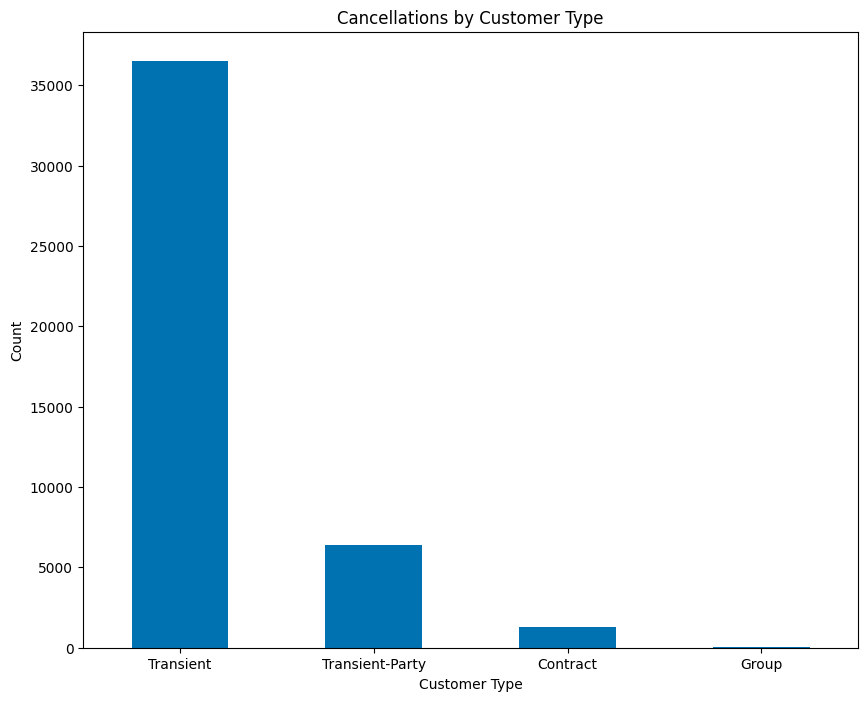

In [ ]:
plt.figure(figsize=(10,8))
df["customer_type"][df["is_canceled"] == 1].value_counts().plot(kind="bar")
plt.xticks(rotation=0);
plt.title('Cancellations by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')

if save_outputs:
    plt.savefig('./Outputs/output_{index}'.format(index=figure_index))
    figure_index += 1


# Data Pre-Processing

**Checklist for Pre-Processing**

---

✔ Duplicates

✔ Missing Values

✔ Inconsistencies

✔ Irrelevant Columns

✔ Highly Correlated Columns

✔ Outliers

✔ Normal Distribution/Standard Deviation

✔ Class Balancing

## Duplicates

In [ ]:
# Check if duplicate rows exist
df[df.duplicated(keep='first')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,1-28
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07,57-84
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07,57-84
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01,1-28
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03,169-196
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,57-84
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,57-84
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,57-84


In [ ]:
# Drop duplicates
df.drop_duplicates(keep='first', inplace=True)

# Recheck if duplicate rows exist
df[df.duplicated(keep='first')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin


## Missing Values

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Counts', 1 : 'Percentage'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Percentage', ascending=False).round(1)

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(df)

,Missing Counts,Percentage
company,82137,94.0
agent,12193,14.0
lead_time_bin,9194,10.5
country,452,0.5
children,4,0.0


In [ ]:
df.drop('company', axis=1, inplace=True)

In [ ]:
# Impute null columns with mode
null_cat_cols = ['country', 'agent']
for col in null_cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute children with mean
df['children'].fillna(df['children'].mean(), inplace=True)

# Check again for missing values
print(df.isnull().sum())

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                                0
days_in_waiting_list                 0
customer_type            

In [ ]:
# Checking for instances of adults, children, and babies 0 at once
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,9.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,NaN
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,NaN
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,29-56
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,141-168
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,141-168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30,85-112
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,9.0,0,Transient,0.00,1,1,Check-Out,2017-07-01,NaN
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17,29-56
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,1-28


In [ ]:
# Removal of these rows
df = df[~filter]

# Rechecking for instances of adults, children, and babies 0 at once
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin


In [ ]:
# Checking for instances of 0 adults but non zero children (Children cannot go without adults)
filter = (df.adults == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin
40984,City Hotel,0,1,2015,August,33,10,1,1,0,3.0,0,BB,PRT,Direct,Direct,0,0,0,B,B,1,No Deposit,9.0,0,Transient-Party,9.00,0,0,Check-Out,2015-08-12,NaN
41048,City Hotel,0,104,2015,August,33,11,0,3,0,2.0,0,BB,FRA,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,7.0,0,Transient-Party,6.00,0,2,Check-Out,2015-08-14,85-112
41446,City Hotel,0,3,2015,August,34,16,2,0,0,2.0,0,BB,PRT,Direct,Direct,0,0,0,B,B,1,No Deposit,9.0,0,Transient-Party,6.00,0,1,Check-Out,2015-08-18,1-28
41952,City Hotel,0,15,2015,August,35,28,0,1,0,2.0,0,BB,PRT,Complementary,Direct,0,0,0,B,B,0,No Deposit,9.0,0,Transient,0.00,0,1,Check-Out,2015-08-29,1-28
45158,City Hotel,1,48,2015,October,43,19,1,3,0,2.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,B,B,0,No Deposit,13.0,0,Transient-Party,6.00,0,1,Canceled,2015-09-02,29-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,30,27,1,3,0,2.0,0,BB,GBR,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,9.0,0,Transient,98.85,0,1,Check-Out,2017-07-31,281-308
117274,City Hotel,0,276,2017,July,31,30,2,1,0,2.0,0,BB,DEU,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,9.0,0,Transient,93.64,0,2,Check-Out,2017-08-02,253-280
117303,City Hotel,0,291,2017,July,30,29,2,2,0,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,9.0,0,Transient,98.85,0,1,Check-Out,2017-08-02,281-308
117453,City Hotel,0,159,2017,July,31,31,1,3,0,2.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,9.0,0,Transient,121.88,0,1,Check-Out,2017-08-04,141-168


In [ ]:
# Removal of these rows
df = df[~filter]

# Rechecking for instances of 0 adults but non zero children
filter = (df.adults == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin


In [ ]:
# Checking for instances of both stays in weekdays and weekends is 0
filter = (df.stays_in_weekend_nights == 0) & (df.stays_in_week_nights == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,337-364
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,729-756
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,0,Transient,0.0,0,2,Check-Out,2015-07-06,85-112
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,0,Transient,0.0,0,0,Check-Out,2015-07-06,NaN
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,9.0,0,Transient,0.0,0,1,Check-Out,2015-07-07,1-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,1-28
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,262.0,0,Transient,0.0,0,0,Check-Out,2017-08-08,NaN
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2017-08-14,NaN
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,57-84


In [ ]:
# Removal of these rows
df = df[~filter]

# Rechecking for instances of 0 nights stayed
filter = (df.stays_in_weekend_nights == 0) & (df.stays_in_week_nights == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin


## Dropping

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1-28
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1-28
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1-28
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,9.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,NaN
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,1-28


In [ ]:
unwanted_cols=['meal', 'distribution_channel', 'agent', 'country', 'required_car_parking_spaces', 'market_segment',
    'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
               'arrival_date_day_of_month', 'days_in_waiting_list']
df.drop(unwanted_cols, axis=1, inplace=True)

df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,lead_time_bin
2,Resort Hotel,0,7,0,1,1,0.0,0,0,0,0,A,C,0,No Deposit,Transient,75.0,1-28
3,Resort Hotel,0,13,0,1,1,0.0,0,0,0,0,A,A,0,No Deposit,Transient,75.0,1-28
4,Resort Hotel,0,14,0,2,2,0.0,0,0,0,0,A,A,0,No Deposit,Transient,98.0,1-28
6,Resort Hotel,0,0,0,2,2,0.0,0,0,0,0,C,C,0,No Deposit,Transient,107.0,NaN
7,Resort Hotel,0,9,0,2,2,0.0,0,0,0,0,C,C,0,No Deposit,Transient,103.0,1-28


## Correlation

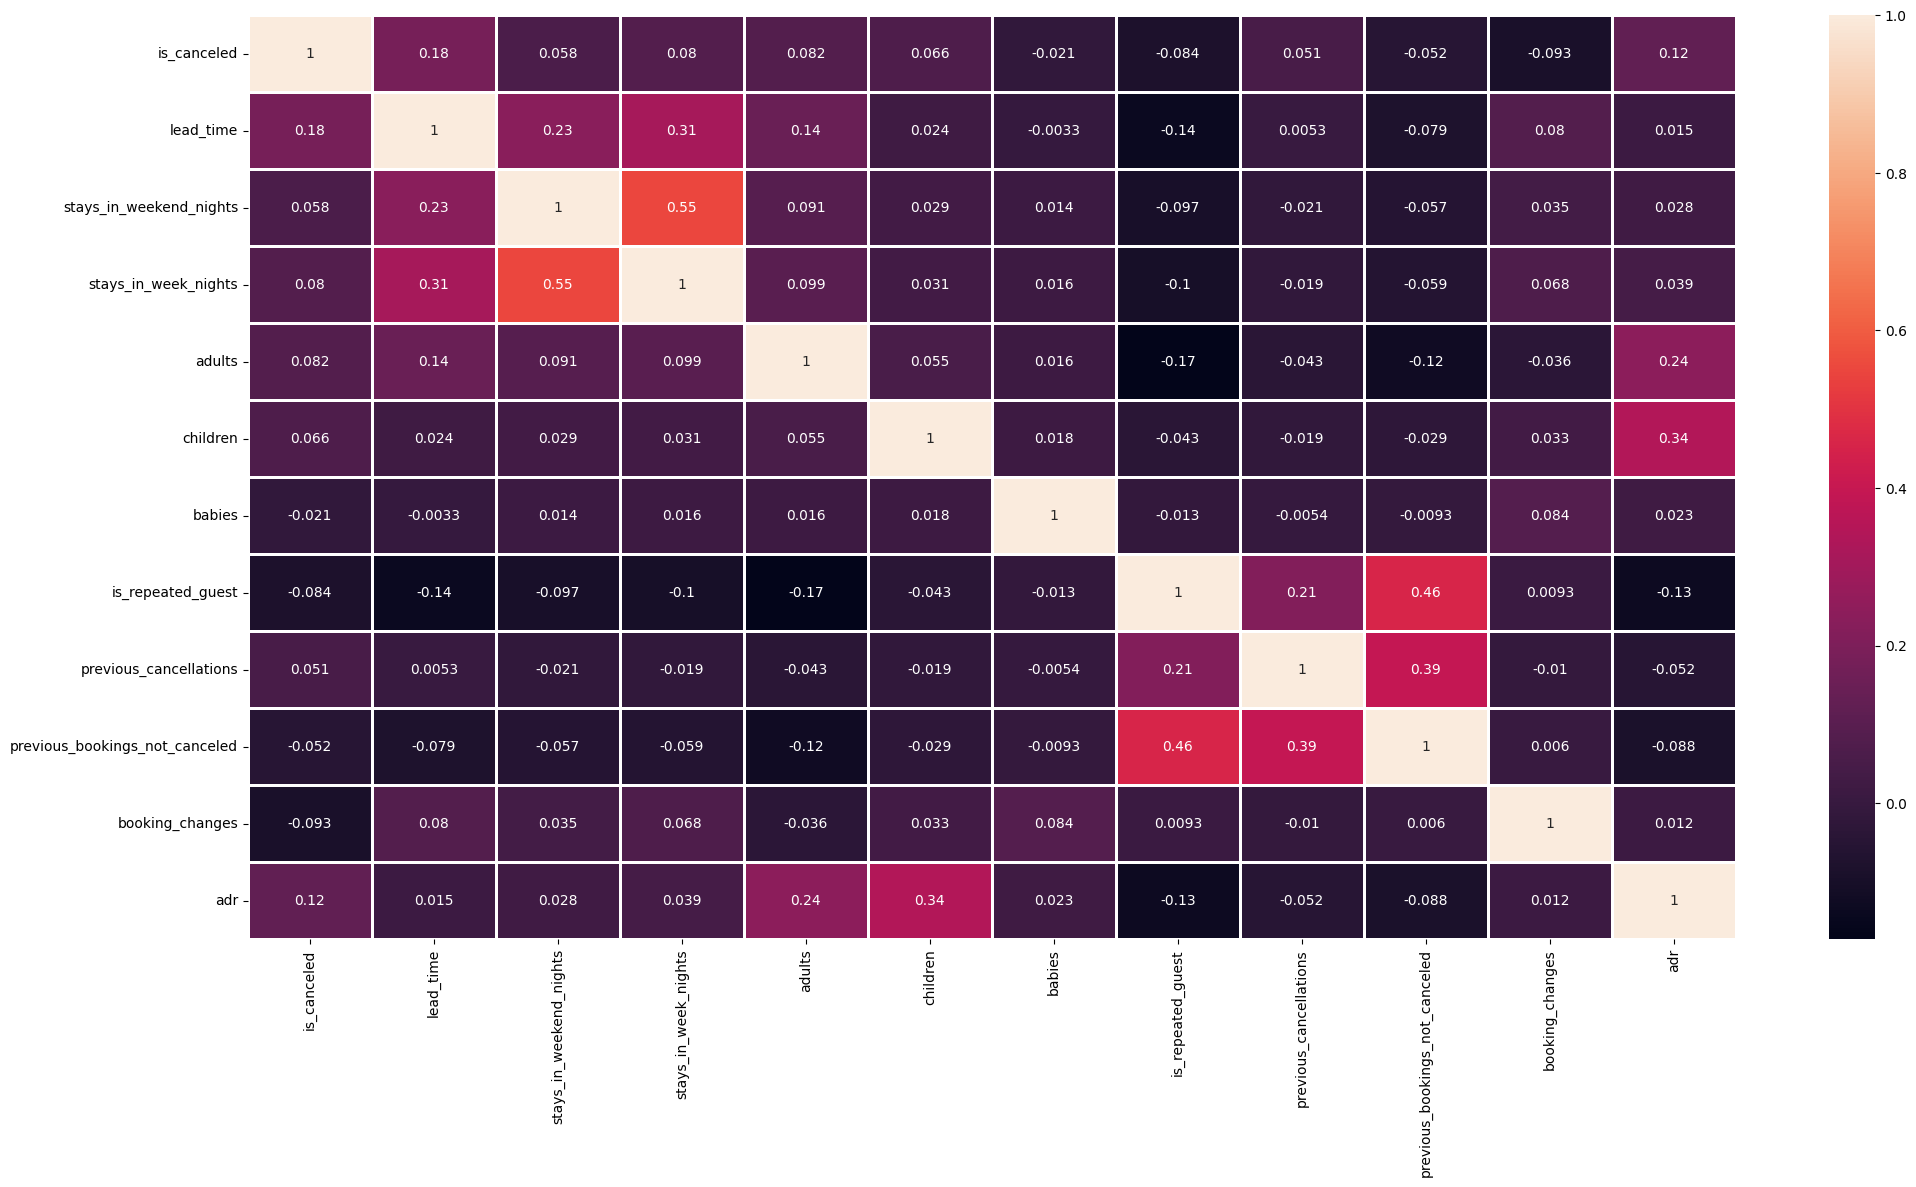

In [ ]:
# Find columns with correlation >0.8

plt.figure(figsize = (24, 12))
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

## Outliers

In [ ]:
df.shape[0]

86420

In [ ]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,lead_time_bin
2,Resort Hotel,0,7,0,1,1,0.0,0,0,0,0,A,C,0,No Deposit,Transient,75.0,1-28
3,Resort Hotel,0,13,0,1,1,0.0,0,0,0,0,A,A,0,No Deposit,Transient,75.0,1-28
4,Resort Hotel,0,14,0,2,2,0.0,0,0,0,0,A,A,0,No Deposit,Transient,98.0,1-28
6,Resort Hotel,0,0,0,2,2,0.0,0,0,0,0,C,C,0,No Deposit,Transient,107.0,NaN
7,Resort Hotel,0,9,0,2,2,0.0,0,0,0,0,C,C,0,No Deposit,Transient,103.0,1-28


In [ ]:
from scipy import stats

# Remove rows will outliers in listed numeric columns
num_cols = ['stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
            'adults', 'children', 'babies', 'lead_time', 'adr']
for col in num_cols:
    df = df[(np.abs(stats.zscore(df[col])) < 3)]

In [ ]:
df.shape[0]

76565

## Encoding

In [ ]:
# Identify all categorical columns
cat_cols = ['hotel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']

# Pandas encoding to factorize categorical columns
for col in cat_cols:
    df[col] = pd.factorize(df[col])[0]
#df = pd.get_dummies(data = df, columns = cat_cols)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,lead_time_bin
2,0,0,7,0,1,1,0.0,0,0,0,0,0,0,0,0,0,75.0,1-28
3,0,0,13,0,1,1,0.0,0,0,0,0,0,1,0,0,0,75.0,1-28
4,0,0,14,0,2,2,0.0,0,0,0,0,0,1,0,0,0,98.0,1-28
6,0,0,0,0,2,2,0.0,0,0,0,0,1,0,0,0,0,107.0,NaN
7,0,0,9,0,2,2,0.0,0,0,0,0,1,0,0,0,0,103.0,1-28


In [ ]:
df.shape

(76565, 18)

## Class Balancing

<Axes: xlabel='is_canceled', ylabel='count'>

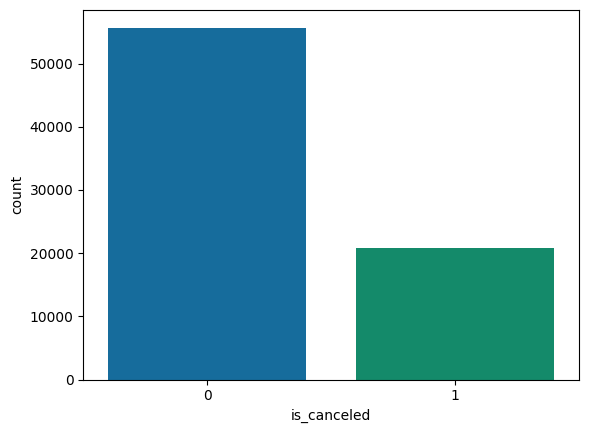

In [ ]:
X = pd.concat([df.iloc[:,0:1], df.iloc[:,2:17]], axis = 1)
#X = df.iloc[:, 1:37]
y = df.iloc[:, 1]

# Depict class balance
sns.countplot(x = 'is_canceled', data=df)

In [ ]:
df['is_canceled'].value_counts()

0    55690
1    20875
Name: is_canceled, dtype: int64

In [ ]:
df.shape

(76565, 18)

<Axes: xlabel='is_canceled', ylabel='count'>

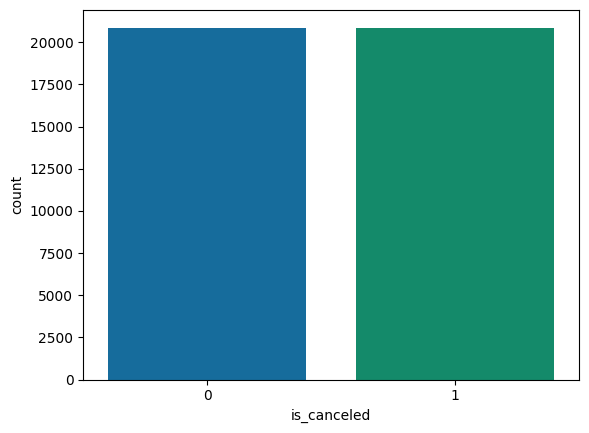

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling X & y
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)

# Depict new class balance
#balanced = pd.concat([X_under, y_under], axis=1)
balanced = pd.concat([pd.DataFrame(X_under, columns=X.columns), pd.Series(y_under, name='is_canceled')], axis=1)

sns.countplot(x = 'is_canceled', data=balanced)

In [ ]:
balanced.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,is_canceled
0,0,196,2,5,2,0.0,0,0,0,0,0,1,0,0,1,96.30,0
1,1,32,0,2,1,0.0,0,0,0,0,0,2,0,0,2,73.00,0
2,1,3,0,1,1,0.0,0,0,0,0,0,1,1,0,0,106.28,0
3,0,12,2,4,3,0.0,0,0,0,0,0,1,1,0,0,202.67,0
4,1,169,2,3,2,0.0,0,0,0,0,0,1,0,0,0,90.95,0


In [ ]:
balanced.shape

(41750, 17)

## Data Seperation

In [ ]:
X = balanced.iloc[:, :16].values
y = balanced.iloc[:, 16].values
y

array([0, 0, 0, ..., 1, 1, 1])

## Normalization

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler().set_output(transform='pandas')
#X = scaler.fit_transform(X)
from sklearn.preprocessing import normalize
X_norm = normalize(X, axis = 0)

print("Examples of X Normalised\n", X_norm[:3])

Examples of X Normalised
 [[0.         0.00837296 0.00733926 0.00812833 0.00497434 0.
  0.         0.         0.         0.         0.         0.00230879
  0.         0.         0.0067546  0.00407966]
 [0.00606718 0.00136701 0.         0.00325133 0.00248717 0.
  0.         0.         0.         0.         0.         0.00461758
  0.         0.         0.0135092  0.00309258]
 [0.00606718 0.00012816 0.         0.00162567 0.00248717 0.
  0.         0.         0.         0.         0.         0.00230879
  0.00992926 0.         0.         0.00450245]]


# Data Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.20, random_state = 1)

print("X train = ", X_train.shape)
print("X test = ", X_test.shape)
print("y train = ", y_train.shape)
print("y test = ", y_test.shape)

X train =  (33400, 16)
X test =  (8350, 16)
y train =  (33400,)
y test =  (8350,)


# Long Short Term Memory (LSTM)

In [134]:
def plot_hist(hist, metric="accuracy"):
    plt.plot(hist.history[metric])
    plt.plot(hist.history["val_" + metric])
    plt.title(f"model performance")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="upper left")
    plt.show()
    return

## Base Model

In [136]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [137]:
classifier = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
classifier.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 50))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units = 1))

# Compiling the RNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

# Fitting the RNN to the Training set
histroy = classifier.fit(X_train, y_train, epochs = 100, batch_size = 32)

classifier.summary()

Epoch 1/100
1044/1044 [==============================] - 56s 47ms/step - loss: 0.7281
Epoch 2/100
1044/1044 [==============================] - 45s 43ms/step - loss: 0.6993
Epoch 3/100
1044/1044 [==============================] - 45s 43ms/step - loss: 0.6907
Epoch 4/100
1044/1044 [==============================] - 43s 42ms/step - loss: 0.6830
Epoch 5/100
1044/1044 [==============================] - 46s 44ms/step - loss: 0.6820
Epoch 6/100
1044/1044 [==============================] - 44s 42ms/step - loss: 0.6816
Epoch 7/100
1044/1044 [==============================] - 48s 46ms/step - loss: 0.6788
Epoch 8/100
1044/1044 [==============================] - 43s 41ms/step - loss: 0.6808
Epoch 9/100
1044/1044 [==============================] - 45s 43ms/step - loss: 0.6829
Epoch 10/100
1044/1044 [==============================] - 44s 42ms/step - loss: 0.6921
Epoch 11/100
1044/1044 [==============================] - 45s 43ms/step - loss: 0.6890
Epoch 12/100
1044/1044 [============================

In [138]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

261/261 [==============================] - 7s 14ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
cm = confusion_matrix(y_test_binary, y_pred_binary)
classification_rep = classification_report(y_test_binary, y_pred_binary)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7081437125748503

Confusion Matrix:
 [[2470 1721]
 [ 716 3443]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.59      0.67      4191
           1       0.67      0.83      0.74      4159

    accuracy                           0.71      8350
   macro avg       0.72      0.71      0.70      8350
weighted avg       0.72      0.71      0.70      8350



# Model Tuning

In [141]:
pip install keras-tuner

In [142]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras

In [143]:
def build_model (hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=16),return_sequences=True,input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(hp.Float("dropout", min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int("units", min_value=32, max_value=128, step=16)))
    model.add(Dropout(hp.Float("dropout", min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation=hp.Choice("dense_activation", ["tanh", "relu", "sigmoid"])))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [146]:
# Random Search algorithm from keras tuner
tuner = kt.RandomSearch(build_model, objective='accuracy', max_trials = 40, overwrite = True)

tuner.search(X_train, y_train, validation_data=(X_test, y_test))

Trial 40 Complete [00h 01m 33s]
accuracy: 0.501526951789856

Best accuracy So Far: 0.5076347589492798
Total elapsed time: 01h 10m 00s


In [127]:
# get params of best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
best_hps.values

{'units': 80, 'dropout': 0.30000000000000004, 'dense_activation': 'tanh'}

In [147]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 16, 80)            26240     
                                                                 
 dropout_2 (Dropout)         (None, 16, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 80)                51520     
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 77,841
Trainable params: 77,841
Non-trainable params: 0
_________________________________________________________________


In [129]:
history = best_model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
)

Epoch 1/5
1044/1044 [==============================] - 69s 57ms/step - loss: 0.7130 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 2/5
1044/1044 [==============================] - 59s 57ms/step - loss: 0.6991 - accuracy: 0.5015 - val_loss: 0.6927 - val_accuracy: 0.5018
Epoch 3/5
1044/1044 [==============================] - 59s 56ms/step - loss: 0.6971 - accuracy: 0.5047 - val_loss: 0.6939 - val_accuracy: 0.4981
Epoch 4/5
1044/1044 [==============================] - 61s 59ms/step - loss: 0.6975 - accuracy: 0.5096 - val_loss: 0.6865 - val_accuracy: 0.5474
Epoch 5/5
1044/1044 [==============================] - 60s 57ms/step - loss: 0.6960 - accuracy: 0.5079 - val_loss: 0.6959 - val_accuracy: 0.5019


In [130]:
y_pred = best_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", cm)
print("\nclassification_report: \n", classification_report(y_test, y_pred))

261/261 [==============================] - 5s 14ms/step
Accuracy:  0.5019161676646706

Confusion Matrix: 
 [[4191    0]
 [4159    0]]

classification_report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      4191
           1       0.00      0.00      0.00      4159

    accuracy                           0.50      8350
   macro avg       0.25      0.50      0.33      8350
weighted avg       0.25      0.50      0.34      8350



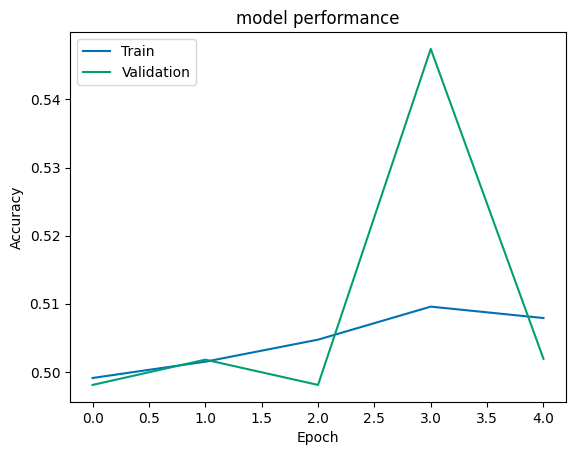

In [135]:
plot_hist(history)